In [2]:
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json

In [4]:
# datasets
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [5]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
df.shape

(244, 7)

In [7]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [8]:
df.describe(exclude='number')

,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


In [9]:
df.describe(include='number')

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [10]:
df['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [11]:
df['time'].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

In [15]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


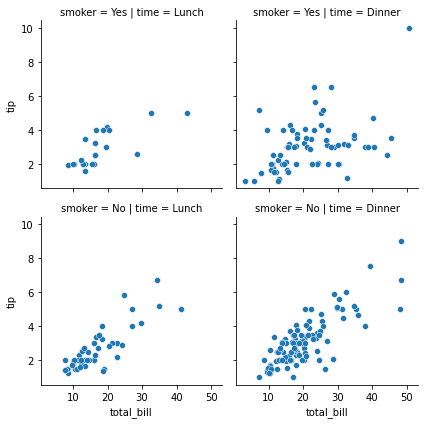

In [17]:
d = sns.FacetGrid(  ## levels 
    df,
    col = 'time',
    row = 'smoker'
)

d.map(sns.scatterplot,
    'total_bill',
    'tip')

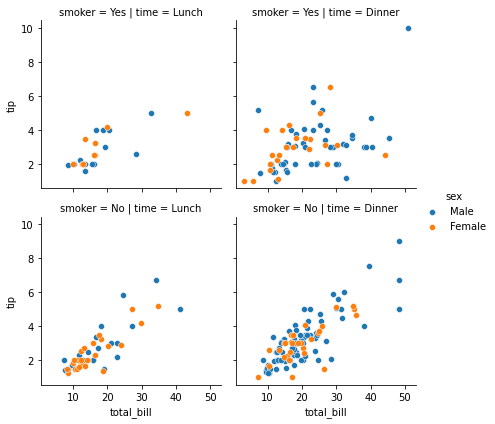

In [19]:
d = sns.FacetGrid(  ## levels 
    df,
    col = 'time',
    row = 'smoker',
    hue = 'sex'
)

d.map(sns.scatterplot,
    'total_bill',
    'tip')

d.add_legend()

In [22]:
df2 = sns.load_dataset('penguins')
df2.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


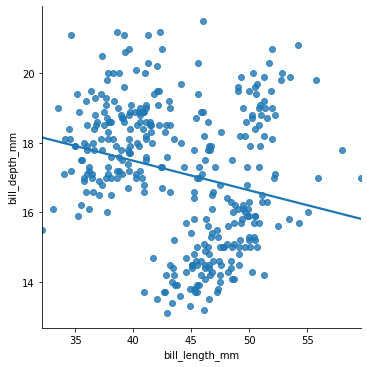

In [24]:
sns.lmplot(
    data=df2,
    x='bill_length_mm',
    y='bill_depth_mm',
    ci=None
) # shadow area confidence interval ignore

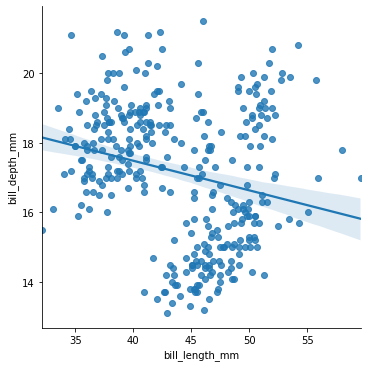

In [25]:
sns.lmplot(
    data=df2,
    x='bill_length_mm',
    y='bill_depth_mm',
) # sh

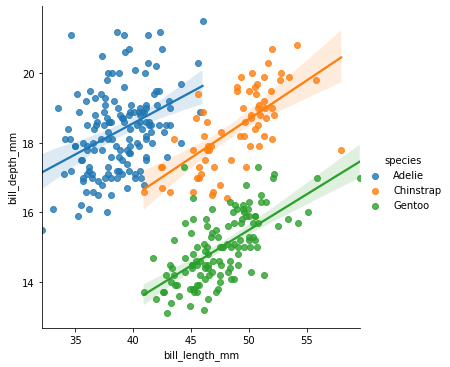

In [26]:
sns.lmplot(
    data=df2,
    x='bill_length_mm',
    y='bill_depth_mm',
    hue='species'
) # sh

In [27]:
df2.island.value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

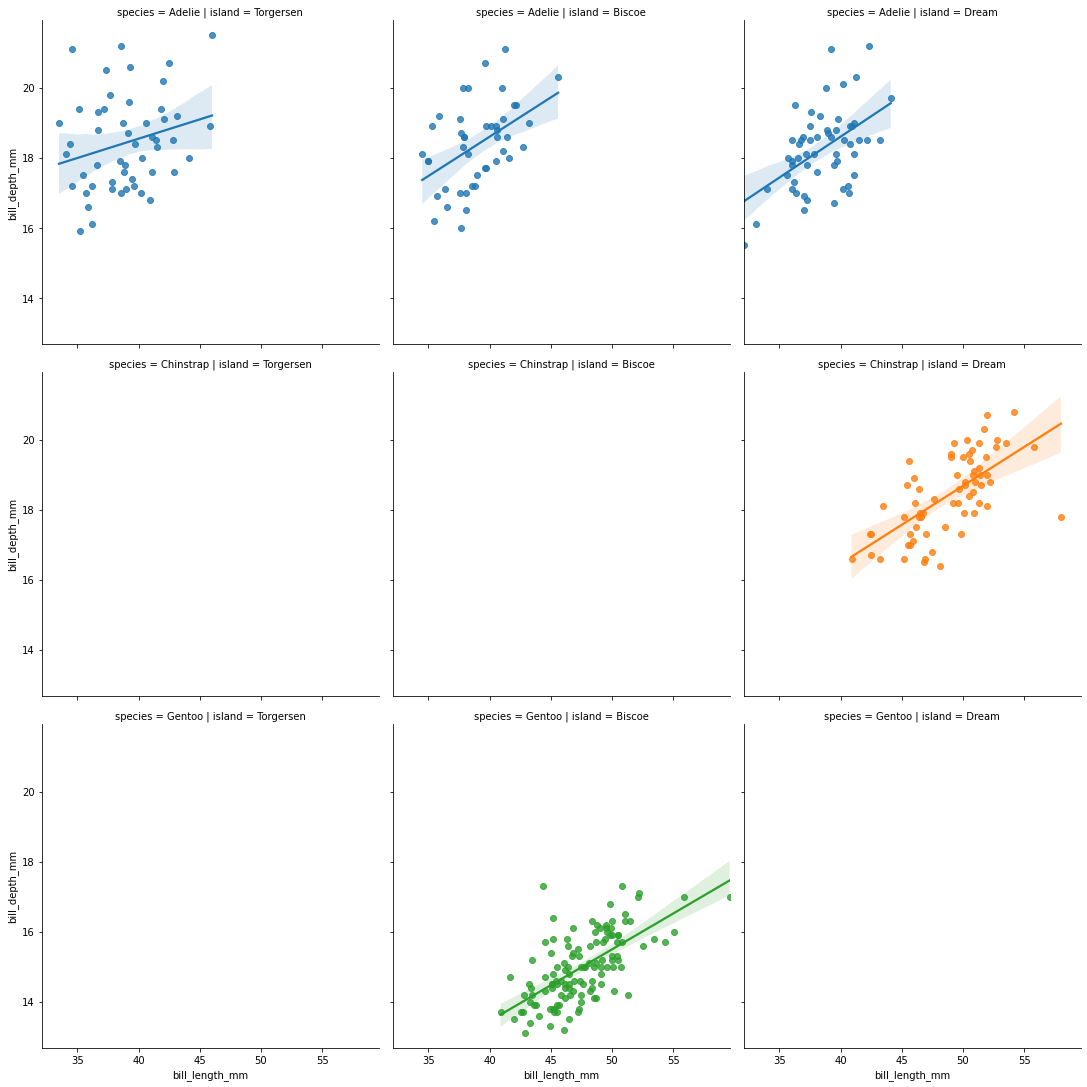

In [28]:
sns.lmplot(
    data=df2,
    x='bill_length_mm',
    y='bill_depth_mm',
    hue='species',
    col = 'island',
    row = 'species'
) # sh

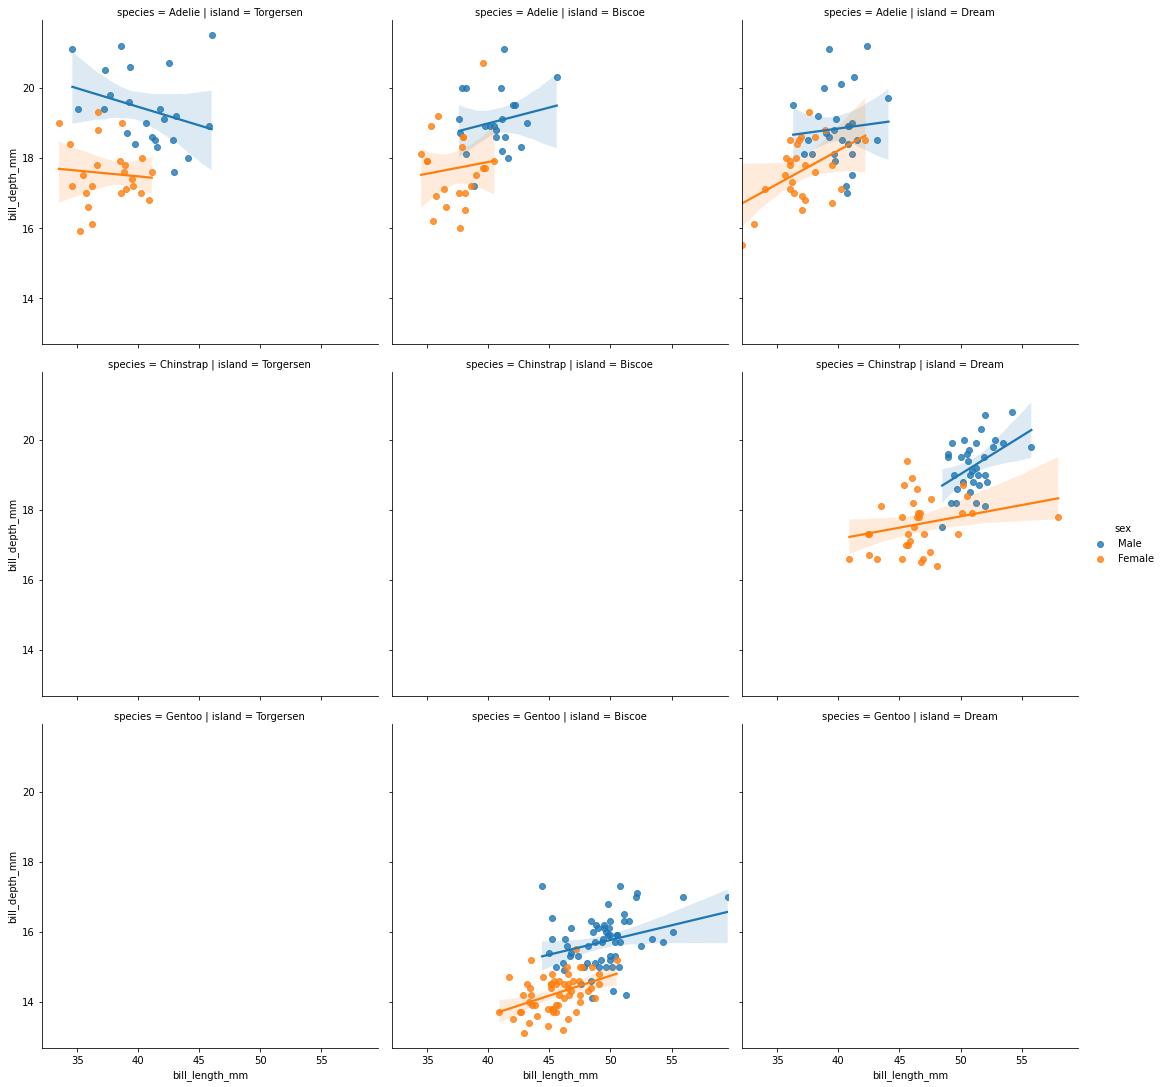

In [29]:
sns.lmplot(
    data=df2,
    x='bill_length_mm',
    y='bill_depth_mm',
    hue='sex',
    col = 'island',
    row = 'species'
) # sh

In [30]:
# heatmap
df2.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [31]:
df2.corr() # correlation from -1 to 1 use heatmap

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


<AxesSubplot:>

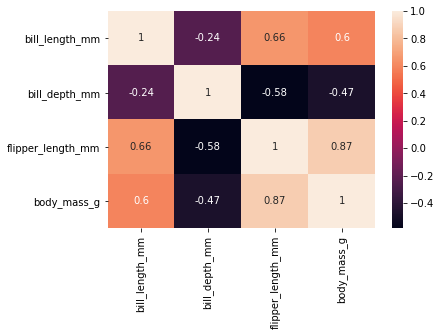

In [33]:
corr_m = df2.corr()
sns.heatmap(corr_m, annot=True)

In [34]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [36]:
df = sns.load_dataset('diamonds')

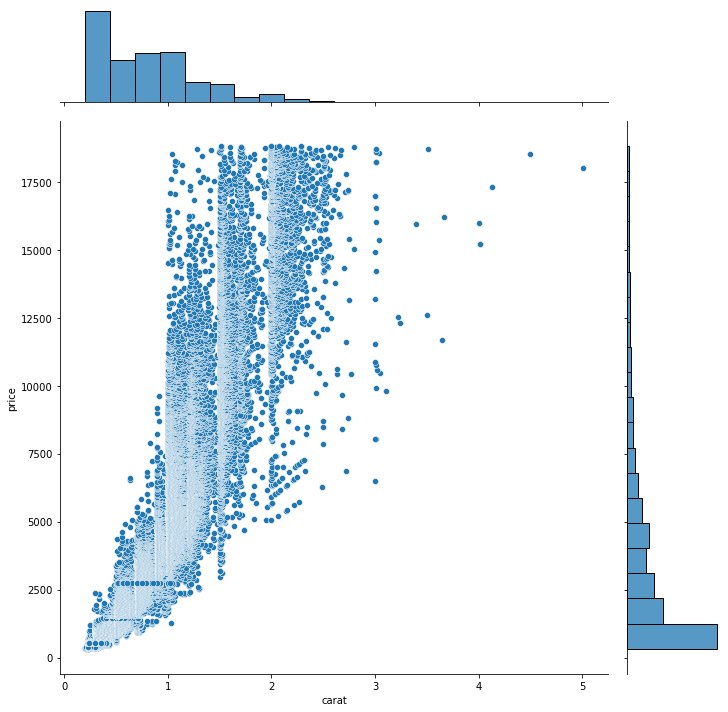

In [39]:
sns.jointplot(
    data=df,
    x='carat',
    y='price',
    height=10,
    marginal_kws=dict(bins=20)
) # three plots

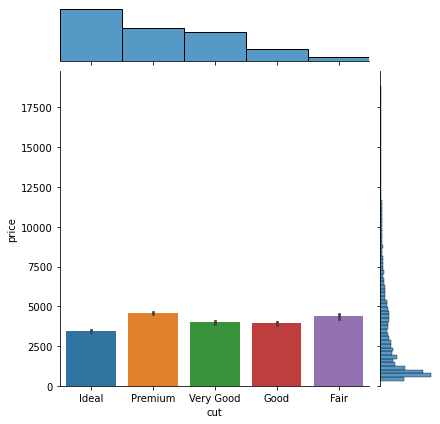

In [40]:
g = sns.JointGrid(data=df,
x='cut',
y='price')

g.plot(sns.barplot,
    sns.histplot
)

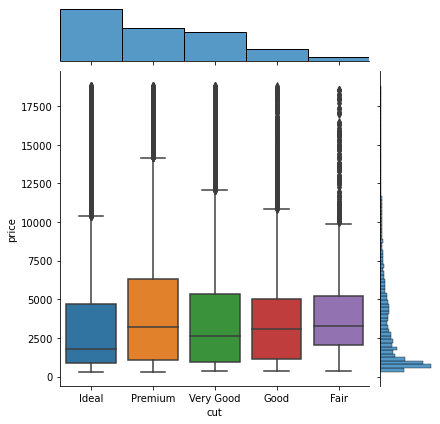

In [41]:
g = sns.JointGrid(data=df,
x='cut',
y='price')

g.plot(sns.boxplot,
    sns.histplot
)

In [42]:
df = sns.load_dataset('diamonds')

In [44]:
df.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [47]:
df.loc['depth']['53939']

KeyError: 'depth'